In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model

# Assignment 4

# Boston Housing Dataset

In [228]:
phi = np.loadtxt('D:/GUVI ASSIGMENT/TASK 6/ASSIGNMENT 4/train - train.csv', dtype='float', delimiter=',', skiprows=1,
                 usecols=tuple(range(1, 14)))

y = np.loadtxt('D:/GUVI ASSIGMENT/TASK 6/ASSIGNMENT 4/train - train.csv', dtype='float', delimiter=',', skiprows=1,
               usecols=14, ndmin=2)

phi_test = np.loadtxt('D:/GUVI ASSIGMENT/TASK 6/ASSIGNMENT 4/test - test.csv', dtype='float', delimiter=',',
                      skiprows=1, usecols=tuple(range(1, 14)))

In [233]:
phi = np.concatenate((phi, np.ones((400, 1))), axis=1)
phi_test = np.concatenate((phi_test, np.ones((105, 1))), axis=1)

In [236]:
phi

array([[1.06411199e-02, 0.00000000e+00, 2.81524927e-01, ...,
        4.26074896e-01, 1.00000000e+00, 1.00000000e+00],
       [2.21317669e-04, 2.94736842e-01, 5.34457478e-01, ...,
        1.19001387e-01, 1.00000000e+00, 1.00000000e+00],
       [1.36513324e-02, 0.00000000e+00, 7.00879765e-01, ...,
        7.40638003e-02, 1.00000000e+00, 1.00000000e+00],
       ...,
       [7.47001646e-02, 0.00000000e+00, 6.46627566e-01, ...,
        3.34812760e-01, 1.00000000e+00, 1.00000000e+00],
       [1.37252923e-03, 0.00000000e+00, 2.96920821e-01, ...,
        3.37586685e-01, 1.00000000e+00, 1.00000000e+00],
       [6.24949841e-04, 7.36842105e-01, 6.52492669e-02, ...,
        8.46047157e-02, 1.00000000e+00, 1.00000000e+00]])

In [237]:
phi_test

array([[1.09096460e-03, 3.15789474e-01, 1.63856305e-01, ...,
        2.90707351e-01, 1.00000000e+00, 1.00000000e+00],
       [3.73205208e-03, 0.00000000e+00, 2.53665689e-01, ...,
        1.16504854e-01, 1.00000000e+00, 1.00000000e+00],
       [1.37557979e-01, 0.00000000e+00, 6.46627566e-01, ...,
        3.81969487e-01, 1.00000000e+00, 1.00000000e+00],
       ...,
       [5.00634279e-04, 2.21052632e-01, 1.89882698e-01, ...,
        9.32038835e-02, 1.00000000e+00, 1.00000000e+00],
       [1.07489125e-03, 4.21052632e-01, 2.18108504e-01, ...,
        1.14563107e-01, 1.00000000e+00, 1.00000000e+00],
       [5.11066221e-02, 0.00000000e+00, 6.46627566e-01, ...,
        1.44244105e-01, 1.00000000e+00, 1.00000000e+00]])

In [231]:
for i in range(0, 13):
    col_max = max(phi[:, i])
    col_min = min(phi[:, i])
    phi[:, i] = (phi[:, i] - col_min) / (col_max - col_min)
    phi_test[:, i] = (phi_test[:, i] - col_min) / (col_max - col_min)

In [232]:
y = np.log(y)

In [238]:
def delta_w(p, phi, w):
    if p == 2:
        deltaw = (2 * (np.dot(np.dot(np.transpose(phi), phi), w) -
                       np.dot(np.transpose(phi), y)) +
                  lambd * p * np.power(np.absolute(w), (p - 1)))
    if p < 2 and p > 1:
        deltaw = (2 * (np.dot(np.dot(np.transpose(phi), phi), w) -
                       np.dot(np.transpose(phi), y)) +
                  lambd * p * np.power(np.absolute(w), (p - 1)) * np.sign(w))
    return deltaw

In [239]:
filenames = {'output.csv': 2.0,
             'output_p1.csv': 1.75,
             'output_p2.csv': 1.5,
             'output_p3.csv': 1.3
             }

Assignment 4 is hard for me to solve so I'm leaving

# Assignment 5

# Ground Criket Chirps

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [3]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [6]:
x = df['Ground Temperature']
x = x.to_frame()
y = df['Chirps/Second']

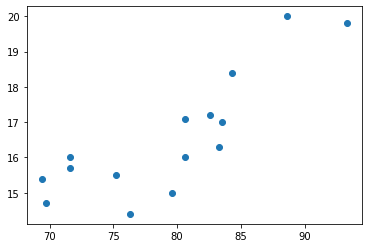

In [7]:
plt.scatter(x,y)

1. Find the linear regression equation for this data.
*Answer :

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(x,y)

LinearRegression()

In [11]:

print('intercept:', lr.intercept_)
print('coefficient:', lr.coef_)

intercept: 0.45931464523595267
coefficient: [0.20299973]


In [14]:
df['pred'] = lr.predict(x)

In [15]:
df.head()

,Chirps/Second,Ground Temperature,pred
0,20.0,88.6,18.445091
1,16.0,71.6,14.994095
2,19.8,93.3,19.399190
3,18.4,84.3,17.572192
4,17.1,80.6,16.821093


2. Chart the original data and the equation on the chart.
*Answer :

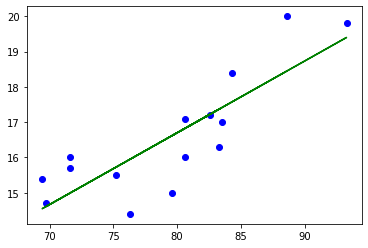

In [18]:
plt.scatter(x, y, color='blue')
plt.plot(x, df['pred'], color='green')
plt.show()

3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
*Anser :

In [23]:
print('r-square score :', lr.score(x,y))

r-square score : 0.6922946529146998


4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
*Anser :

# Extrapolate

In [27]:
b = np.array([[95]])
print('Extrapolate Value :' ,lr.predict(b))

Extrapolate Value : [19.74428913]


5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 
*Answer :

# Interploate

In [30]:
print('Interploate Value :' ,(18 - lr.intercept_) / lr.coef_)

Interploate Value : [86.40743135]


# Assignment 6

# Brain vs. Body Weight

In [31]:
df = pd.read_fwf("D:/GUVI ASSIGMENT/TASK 6/ASSIGNMENT 6/brain_body.txt")
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [32]:

x = df['Brain']
x = x.to_frame()
y = df['Body']

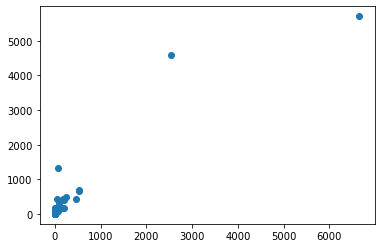

In [34]:
plt.scatter(x,y)

1. Find the linear regression equation for this data for brain weight to body weight.
*Answer :

In [33]:
lr.fit(x, y)

LinearRegression()

In [35]:
print('intercept:', lr.intercept_)
print('coefficient:', lr.coef_)

intercept: 91.00439620740687
coefficient: [0.96649637]


2. Chart the original data and the equation on the chart.
*Answer:

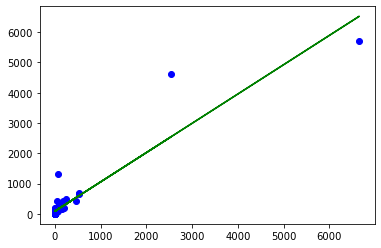

In [37]:
plt.scatter(x, y, color='blue')
plt.plot(x, lr.predict(x), color='green')

3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
*Answer :

In [38]:
print('r-square score: ', lr.score(x, y))

r-square score:  0.8726620843043331


# Assignment7

# Salary Discrimination

In [39]:
df = pd.read_fwf("D:/GUVI ASSIGMENT/TASK 6/ASSIGNMENT 7/salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [41]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


1. Find the linear regression equation for this data using columns 1-5 to column 6.
*Answer :

In [70]:
x = df.drop('Salary', axis = 1)
y = df.Salary

In [71]:
lr.fit(x,y)

LinearRegression()

In [73]:
df['pred'] = lr.predict(x)

In [76]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary,pred
0,0,3,25,1,35,36350,34400.870954
1,0,3,13,1,22,35350,30280.831196
2,0,3,10,1,23,28200,28703.461319
3,1,3,7,1,27,26775,27981.512221
4,0,3,19,0,30,33696,33479.309278


2. Find the selection of columns with the best $R^2$ score.
*Answer :

In [50]:
print('selection of columns with the best  𝑅2  score: \n',  list(zip(x, lr.coef_)))

selection of columns with the best  𝑅2  score: 
 [('Sex', 1241.7924996014372), ('Rank', 5586.181449521445), ('Year', 482.85976782882426), ('Degree', -1331.6440634059143), ('YSdeg', -128.79057354486122)]


3. Report whether sex is a factor in salary.
*Answer :

In [ ]:
# correlation = df['Sex'].corr(df['Salary'])
correlation

In [ ]:
Sex not effect Salary

# Assignment8

# Car Price Prediction

In [82]:
df = pd.read_csv('D:/GUVI ASSIGMENT/TASK 6/ASSIGNMENT 8/car_data.csv')
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


# Task, Part - 1

1. Find the linear regression equation for mileage vs price.
*Answer :

In [86]:
x = df['Mileage']
x = x.to_frame()
y = df['Price']

In [87]:
lr.fit(x,y)

LinearRegression()

In [107]:
print('intercept:', lr.intercept_)
print('coefficients:', lr.coef_)

intercept: 24764.559006061685
coefficients: [-0.1725205]


In [89]:
df['pred'] =  lr.predict(x)

In [91]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,pred
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,23346.267953
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,23188.584213
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,22487.978451
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,21945.228949
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,21343.132395


2. Chart the original data and the equation on the chart.
*Answer :

Text(0, 0.5, 'Price')

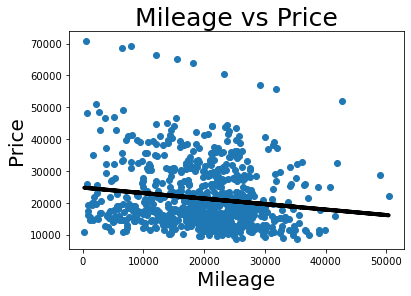

In [105]:
plt.scatter(x, y)
plt.plot(x, df.pred, linewidth=4,  color='black' )
plt.title('Mileage vs Price', fontsize = 25)
plt.xlabel('Mileage', fontsize = 20)
plt.ylabel('Price', fontsize = 20)

3. Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
*Answer :

In [109]:
print('r-square score:', lr.score(x, y))

r-square score: 0.02046344732348948


we got 0.020 r-square score that means our equation is not good for this data and Mileage and Price not correlated strongly.

# Task, Part - 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
*Answer :

In [110]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'pred'],
      dtype='object')

In [112]:
x = df[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]
y = df['Price']

In [113]:
lr.fit(x,y)

LinearRegression()

In [128]:
print('intercept:', lr.intercept_)
print('coefficients:', lr.coef_)

intercept: 6758.755143598082
coefficients: [-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
  6.28899715e+03 -1.99379528e+03  3.34936162e+03]


In [114]:
df['new_pred'] = lr.predict(x)

In [115]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,pred,new_pred
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,23346.267953,27150.727639
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,23188.584213,23646.216500
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,22487.978451,22956.870553
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,21945.228949,24416.639149
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,21343.132395,27173.580833


2. Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
*Answer :

In [117]:
lr.score(x,y)

0.446264353672838

we got 0.44 r-square score that means our equation is not  very much good for this data and mileage, cylinders, liters, doors, cruise, sound, and leather are not very much strongly correlated with price.

3. Find the combination of the factors that is the best predictor for price.
*Answer :



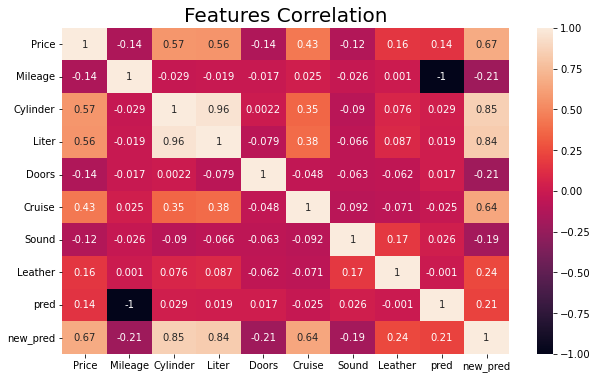

In [125]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.title('Features Correlation', fontsize = 20)
plt.show()

In [127]:
cor = df.corr()
cor_target = abs(cor["Price"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

Price       1.000000
Cylinder    0.569086
Liter       0.558146
new_pred    0.668030
Name: Price, dtype: float64

In [141]:
dfs = df.drop(['pred','new_pred'], axis = 1)
dfs

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


# Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
*Answer :

In [142]:
makes = pd.get_dummies(dfs.Make,drop_first = True)
models = pd.get_dummies(dfs.Model,drop_first = True)
trims = pd.get_dummies(dfs.Trim,drop_first = True)
cylenders = pd.get_dummies(dfs.Cylinder,drop_first = True)
types = pd.get_dummies(dfs.Type,drop_first = True)
doors = pd.get_dummies(dfs.Doors,drop_first = True)
cruises = pd.get_dummies(dfs.Cruise,drop_first = True)
leathers = pd.get_dummies(dfs.Leather,drop_first = True)
sounds = pd.get_dummies(dfs.Sound,drop_first = True)

In [144]:
n_df = pd.concat([dfs,makes,models,trims,cylenders,types,doors,cruises,leathers,sounds],axis = 1)
n_df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,...,6,8,Coupe,Hatchback,Sedan,Wagon,4,1,1,1
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,1,0,0,0,1,0,1,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,1,0,0,0,1,0,1,1,0,1
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,1,0,0,0,1,0,1,1,0,1
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,1,0,0,0,1,0,1,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,1,0,0,0,1,0,1,1,1,0


In [145]:
n_df.drop(['Make','Model','Trim','Cylinder','Type','Doors','Cruise','Leather','Sound'], axis = 1, inplace = True)

In [147]:
n_df.head()

,Price,Mileage,Liter,Cadillac,Chevrolet,Pontiac,SAAB,Saturn,9_3,9_3 HO,...,6,8,Coupe,Hatchback,Sedan,Wagon,4,1,1,1
0,17314.103129,8221,3.1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,1,1,1
1,17542.036083,9135,3.1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,1,0,1
2,16218.847862,13196,3.1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,1,0,1
3,16336.913140,16342,3.1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,1,0,0
4,16339.170324,19832,3.1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,1,1,0


2. Find the best combination of factors to predict price.
*Answer :

In [149]:
cor = n_df.corr()
cor_target = abs(cor["Price"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

Price       1.000000
Liter       0.558146
Cadillac    0.659297
8           0.672420
Name: Price, dtype: float64